### Importación de datos



In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Obtencion de datos de precio de las tiendas

In [261]:

facturacion = {
    "tienda": tienda["Precio"].sum(),
    "tienda2": tienda2["Precio"].sum(),
    "tienda3": tienda3["Precio"].sum(),
    "tienda4": tienda4["Precio"].sum()
}

Creacion de dataframe







In [262]:
df_facturacion = pd.DataFrame(list(facturacion.items()), columns=["Tienda", "Facturación Total"])

visualizacion de la informcion de dataframe

In [224]:
print("\nFacturación Total por Tienda:")
print(df_facturacion)


Facturación Total por Tienda:
     Tienda  Facturación Total
0   tienda        1.150880e+09
1  tienda 2       1.116344e+09
2  tienda 3       1.098020e+09
3  tienda 4       1.038376e+09


Creacion del grafico

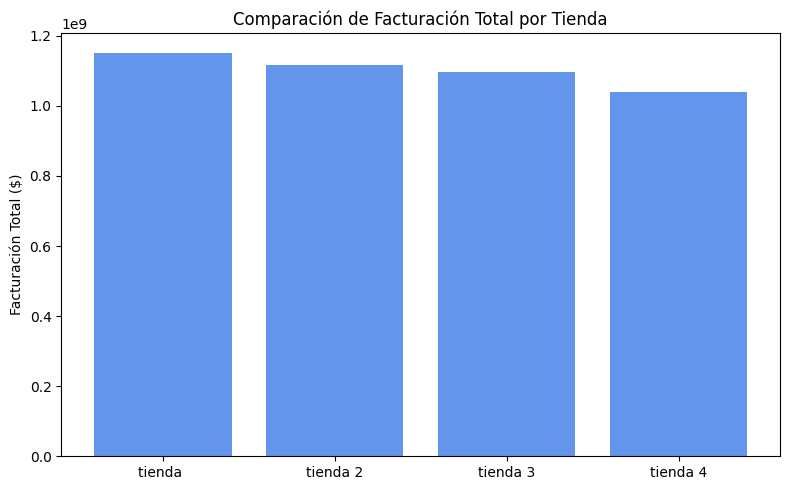

In [225]:
plt.figure(figsize=(8, 5))
plt.bar(df_facturacion["Tienda"], df_facturacion["Facturación Total"], color='cornflowerblue')
plt.ylabel("Facturación Total ($)")
plt.title("Comparación de Facturación Total por Tienda")
plt.tight_layout()
plt.show()

segun este analisis el ranquing de facturacion de cada tienda es :



1.   Facturacion de la tienda 1 es: $ 1150880400

2.   Facturacion de la tienda 2 es: $ 1116343500

3.   Facturacion de la tienda 3 es: $ 1098019600

4.   Facturacion de la tienda 4 es: $ 1038375700



Segun el analisi de facturacion la tienda con mayor facturacion es la tienda 1 y la con menor facturacion es la tienda 4



# 2. Ventas por categoría

funcion para calcular las ventas por categoria para cada tienda

In [226]:
def ventas_por_categoria(df, nombre_tienda):
    ventas = df.groupby("Categoría del Producto")["Precio"].sum().reset_index()
    ventas.columns = ["Categoría", nombre_tienda]
    return ventas

aplicar el calculo de la funcion a cada tienda

In [227]:
ventas1 = ventas_por_categoria(tienda, "Tienda 1")
ventas2 = ventas_por_categoria(tienda2, "Tienda 2")
ventas3 = ventas_por_categoria(tienda3, "Tienda 3")
ventas4 = ventas_por_categoria(tienda4, "Tienda 4")


unir los resultados de las 4 tiendas para su comparacion

In [228]:
comparacion = ventas1.merge(ventas2, on="Categoría", how="outer")
comparacion = comparacion.merge(ventas3, on="Categoría", how="outer")
comparacion = comparacion.merge(ventas4, on="Categoría", how="outer")
comparacion = comparacion.fillna(0)  # Llenar vacíos con 0





tabla comparativa de las ventas por categoria de cada tienda

generacion de grafico de ventas por categorias

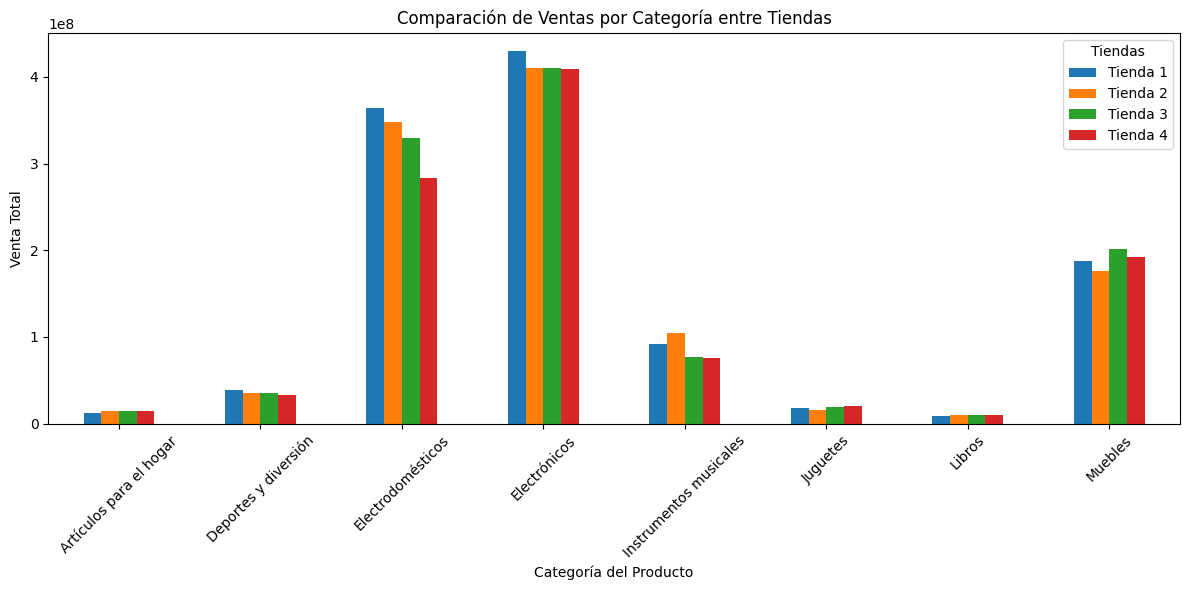

In [229]:
comparacion.set_index("Categoría").plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de Ventas por Categoría entre Tiendas")
plt.xlabel("Categoría del Producto")
plt.ylabel("Venta Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Tiendas")
plt.show()

en este analisis se aprecia que para todas las tiendas la categoria que se dispara por sobre las otras es articulos electronicos.

quedando el ranquing de la siguiente forma:

1.   Tienda 1 con $429493500 de ventas

2.   Tienda 2 con $410831100 de ventas

3.   Tienda 3 con $410775800 de ventas

4.   Tienda 4 con $409476100 de ventas


siendo la tienda con mejores ventas en la catagoria de electronica la "Tienda 1" y la con peores ventas en la misma categoria la "Tienda 4"



# 3. Calificación promedio de la tienda


Calcular calificación promedio por tienda

In [231]:
calificaciones = {
    "tienda ": tienda1["Calificación"].mean(),
    "tienda 2": tienda2["Calificación"].mean(),
    "tienda 3": tienda3["Calificación"].mean(),
    "tienda 4": tienda4["Calificación"].mean()
}

Convertir a DataFrame para mostrar y graficar

In [157]:
df_calificaciones = pd.DataFrame(list(calificaciones.items()), columns=["Tienda", "Calificación Promedio"])

Mostrar tabla

In [158]:
print(df_calificaciones)

     Tienda  Calificación Promedio
0   tienda                3.976685
1  tienda 2               4.037304
2  tienda 3               4.048326
3  tienda 4               3.995759


Graficar

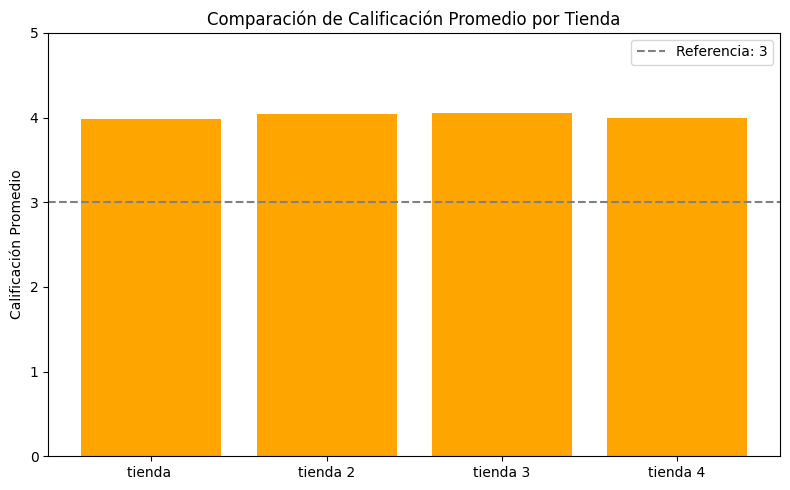

In [159]:
plt.figure(figsize=(8, 5))
plt.bar(df_calificaciones["Tienda"], df_calificaciones["Calificación Promedio"], color='orange')
plt.ylim(0, 5)
plt.ylabel("Calificación Promedio")
plt.title("Comparación de Calificación Promedio por Tienda")
plt.axhline(3, color='gray', linestyle='--', label="Referencia: 3")
plt.legend()
plt.tight_layout()
plt.show()

Para este analisis la "tienda" que tiene mejor promedio de calificacion es:

1.   Tienda 2 con 4.037304
2.   Tienda 3 con 4.048326
3.   Tienda 4 con 3.995759
4.   Tienda 1 con 3.976685

La tienda con mejor calificacion es la tianda 2 y la con peor calificacion es la tienda 1




# 4. Productos más y menos vendidos

Función para obtener los 3 productos mas vendidos y los 3 menos vendidos productos por ventas

In [160]:
def mejores_peores_productos(df, nombre_tienda):
    ventas = df.groupby("Producto")["Precio"].sum().reset_index()
    mejores3 = ventas.sort_values(by="Precio", ascending=False).head(3)
    peores3 = ventas.sort_values(by="Precio", ascending=True).head(3)
    return mejores3.assign(Tienda=nombre_tienda, Tipo="Mejores 3"), peores3.assign(Tienda=nombre_tienda, Tipo="Peores 3")

Obtener datos por tienda

In [161]:
mejor1, peor1 = mejores_peores_productos(tienda, "Tienda 1")
mejor2, peor2 = mejores_peores_productos(tienda2, "Tienda 2")
mejor3, peor3 = mejores_peores_productos(tienda3, "Tienda 3")
mejor4, peor4 = mejores_peores_productos(tienda4, "Tienda 4")

Unir todos

In [162]:
comparativo = pd.concat([mejor1, peor1, mejor2, peor2, mejor3, peor3, mejor4, peor4], ignore_index=True)

Mostrar tabla

In [163]:
print("\nComparativo Mejores y Peores 3 productos por tienda:")
print(comparativo.sort_values(by=["Tienda", "Tipo", "Precio"], ascending=[True, True, False]))


Comparativo Mejores y Peores 3 productos por tienda:
              Producto       Precio    Tienda       Tipo
0        TV LED UHD 4K  142150200.0  Tienda 1  Mejores 3
1         Refrigerador  112143300.0  Tienda 1  Mejores 3
2            Iphone 15   97902200.0  Tienda 1  Mejores 3
5      Cubo mágico 8x8     696900.0  Tienda 1   Peores 3
4       Dinosaurio Rex     688900.0  Tienda 1   Peores 3
3   Cuerda para saltar     652800.0  Tienda 1   Peores 3
6            Iphone 15  113225800.0  Tienda 2  Mejores 3
7        TV LED UHD 4K  103375000.0  Tienda 2  Mejores 3
8         Refrigerador   97632500.0  Tienda 2  Mejores 3
11  Cuerda para saltar     856900.0  Tienda 2   Peores 3
10      Dinosaurio Rex     770300.0  Tienda 2   Peores 3
9      Cubo mágico 8x8     643600.0  Tienda 2   Peores 3
12        Refrigerador   99889700.0  Tienda 3  Mejores 3
13       TV LED UHD 4K   96669100.0  Tienda 3  Mejores 3
14           Iphone 15   93225700.0  Tienda 3  Mejores 3
17  Cuerda para saltar     853800.

Configurar gráfico

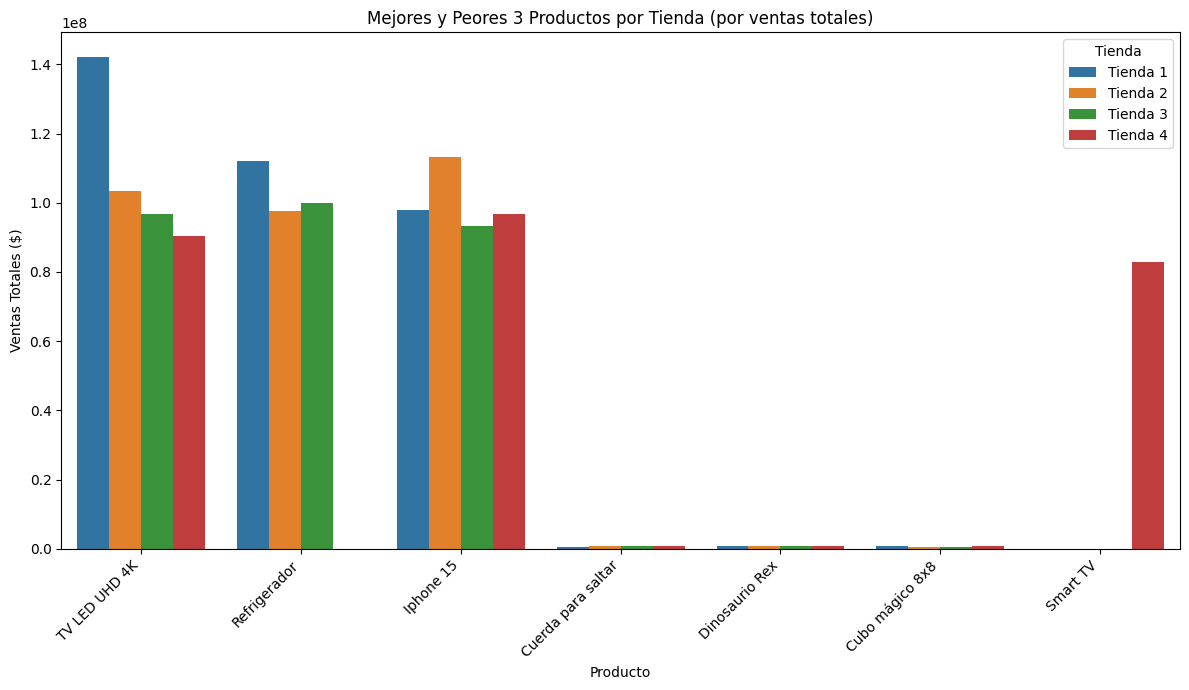

In [164]:
plt.figure(figsize=(12, 7))
sns.barplot(data=comparativo, x="Producto", y="Precio", hue="Tienda", dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title("Mejores y Peores 3 Productos por Tienda (por ventas totales)")
plt.ylabel("Ventas Totales ($)")
plt.xlabel("Producto")
plt.tight_layout()
plt.show()

Para este analisis se toman los 3 productos mas vendidos y los tres menos vendidos de cada tienda , se representan de acuerdo al volumen de venta .

se aprecia que casi para todas las tiendas los 3 productos mas vendidos son "TV led uhd 4k", "Refrigerador", "Iphone 15" pero los menos vendidos para las 4 tiendas son "cuerda para saltar", Dinosaurio rex", cubo magico 8x8".



# 5. Envío promedio por tienda

Leer los archivos

In [165]:
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

Calcular envío promedio por tienda

In [232]:
envios = {
    "tienda ": tienda1["Costo de envío"].mean(),
    "tienda 2": tienda2["Costo de envío"].mean(),
    "tienda 3": tienda3["Costo de envío"].mean(),
    "tienda 4": tienda4["Costo de envío"].mean()
}

Crear DataFrame


In [233]:
df_envios = pd.DataFrame(list(envios.items()), columns=["Tienda", "Envío Promedio"])

mostrar tabla

In [234]:
print("\nCosto de Envío Promedio por Tienda:")
print(df_envios)


Costo de Envío Promedio por Tienda:
     Tienda  Envío Promedio
0   tienda     26018.609580
1  tienda 2    25216.235693
2  tienda 3    24805.680373
3  tienda 4    23459.457167


Graficar

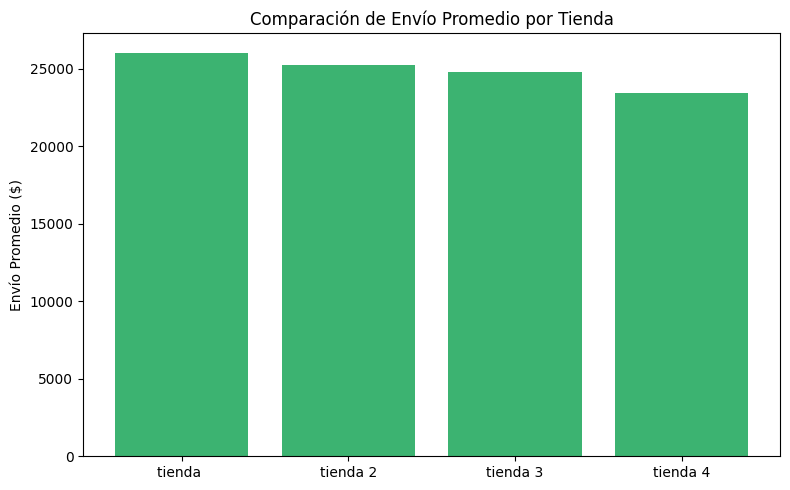

In [235]:
plt.figure(figsize=(8, 5))
plt.bar(df_envios["Tienda"], df_envios["Envío Promedio"], color='mediumseagreen')
plt.ylabel("Envío Promedio ($)")
plt.title("Comparación de Envío Promedio por Tienda")
plt.tight_layout()
plt.show()

en este analis podemos indicar que la "Tienda 1 # es la tienda con mayor envio promedio y la con peor desempeño es la "Tienda 4"

analisis de los data frame de las tiendas

In [237]:
facturacion = {
    "tienda ": tienda1["Precio"].sum(),
    "tienda 2": tienda2["Precio"].sum(),
    "tienda 3": tienda3["Precio"].sum(),
    "tienda 4": tienda4["Precio"].sum()
}

df_facturacion = pd.DataFrame(list(facturacion.items()), columns=["Tienda", "Facturación Total"])

calificaciones = {
    "tienda ": tienda1["Calificación"].mean(),
    "tienda 2": tienda2["Calificación"].mean(),
    "tienda 3": tienda3["Calificación"].mean(),
    "tienda 4": tienda4["Calificación"].mean()
}


df_calificaciones = pd.DataFrame(list(calificaciones.items()), columns=["Tienda", "Calificación Promedio"])

envios = {
    "tienda ": tienda1["Costo de envío"].mean(),
    "tienda 2": tienda2["Costo de envío"].mean(),
    "tienda 3": tienda3["Costo de envío"].mean(),
    "tienda 4": tienda4["Costo de envío"].mean()
}

df_envios = pd.DataFrame(list(envios.items()), columns=["Tienda", "Envío Promedio"])




In [239]:
# Limpiamos los nombres de tienda para que coincidan
df_facturacion["Tienda"] = df_facturacion["Tienda"].str.strip()
df_calificaciones["Tienda"] = df_calificaciones["Tienda"].str.strip()
df_envios["Tienda"] = df_envios["Tienda"].str.strip()

In [240]:
# Unimos los tres DataFrames por "Tienda"
df_comparativo = df_facturacion \
    .merge(df_calificaciones, on="Tienda") \
    .merge(df_envios, on="Tienda")

In [241]:
# Mostramos el DataFrame combinado
print("\n📊 Comparativo de rendimiento de tiendas:")
print(df_comparativo)


📊 Comparativo de rendimiento de tiendas:
     Tienda  Facturación Total  Calificación Promedio  Envío Promedio
0    tienda       1.150880e+09               3.976685    26018.609580
1  tienda 2       1.116344e+09               4.037304    25216.235693
2  tienda 3       1.098020e+09               4.048326    24805.680373
3  tienda 4       1.038376e+09               3.995759    23459.457167


Luego de hacer este extenso analisis   yo recomiendo que la tienda que se debe vender es la numero 4 ya que de los 5 analisis solicitados es la que mas veces quedo ultima en desempeño.-